In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
inv_path = np.load('inventory_path.npy')
reward_dist = np.load('reward_distribution.npy')


In [6]:
# declare a pandas dataframe

reward_df = pd.DataFrame()
reward_df['first_reward'] = reward_dist[0]
reward_df['second_reward'] = reward_dist[1]
reward_df['third_reward'] = reward_dist[2]
reward_df['fourth_reward'] = reward_dist[3]
reward_df.head()




,first_reward,second_reward,third_reward,fourth_reward
0,-101.049980,-906.502794,-13.543991,-31.935526
1,-46.127331,-66.548660,-384.712893,-73.258141
2,-77.471109,-1107.336225,-274.085363,-450.402256
3,-104.072825,-1117.885322,-168.408786,-31.545110
4,-500.526389,-273.779032,-745.945383,-118.164251


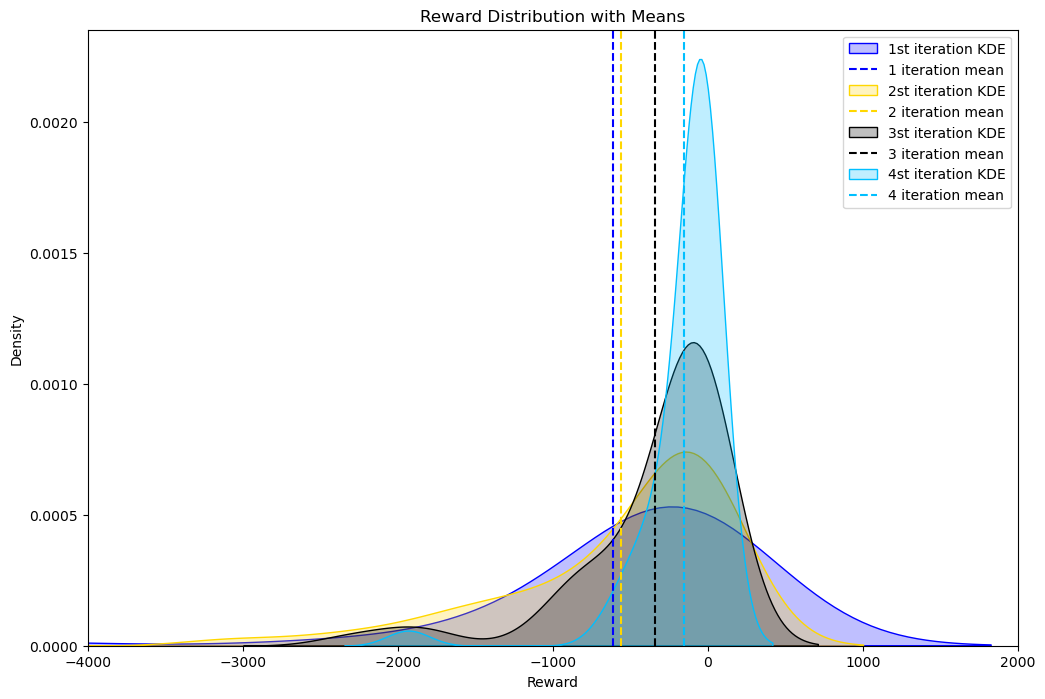

<Figure size 640x480 with 0 Axes>

In [7]:
# use seaborn to plot the reward distribution 

reward_columns = ['first_reward', 'second_reward', 'third_reward', 'fourth_reward']

# Define colors for the means
mean_colors = ['blue', 'gold', 'black', 'deepskyblue']

# Set up the plot
plt.figure(figsize=(12, 8))  # Optional: Adjust figure size for better visibility
plt.xlim(-4000, 2000)

# Plot KDE for each reward column and its mean
for column, color in zip(reward_columns, mean_colors):
    # get the index
    index = reward_columns.index(column)
    # Plot the KDE
    sns.kdeplot(reward_df[column], color=color, fill=True, label=f'{index + 1}st iteration KDE')
    
    # Calculate and plot the mean
    mean_value = reward_df[column].mean()
    plt.axvline(mean_value, linestyle='--', color=color, label=f'{index + 1} iteration mean')

# Setting labels and title
plt.xlabel('Reward')
plt.ylabel('Density')
plt.title('Reward Distribution with Means')

# Improve the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Deduplicate legend entries
plt.legend(by_label.values(), by_label.keys())

# Display the plot
plt.show()

# save the plot
plt.savefig('reward_distribution_plot.png')

In [8]:
# get the inventory path 

inventory_df = pd.DataFrame()   

inv_path.shape

(5, 50, 10, 2)

In [9]:
first_option_terminal_inv_df = pd.DataFrame()
second_option_terminal_inv_df = pd.DataFrame()

first_option_terminal_inv_df['first_option_terminal_inventory'] = inv_path[1, :, -1, 0]
first_option_terminal_inv_df['second_option_terminal_inventory'] = inv_path[2, :, -1, 0]
first_option_terminal_inv_df['third_option_terminal_inventory'] = inv_path[3, :, -1, 0]
first_option_terminal_inv_df['fourth_option_terminal_inventory'] = inv_path[4, :, -1, 0]

second_option_terminal_inv_df['first_option_terminal_inventory'] = inv_path[1, :, -1, 1]
second_option_terminal_inv_df['second_option_terminal_inventory'] = inv_path[2, :, -1, 1]
second_option_terminal_inv_df['third_option_terminal_inventory'] = inv_path[3, :, -1, 1]
second_option_terminal_inv_df['fourth_option_terminal_inventory'] = inv_path[4, :, -1, 1]




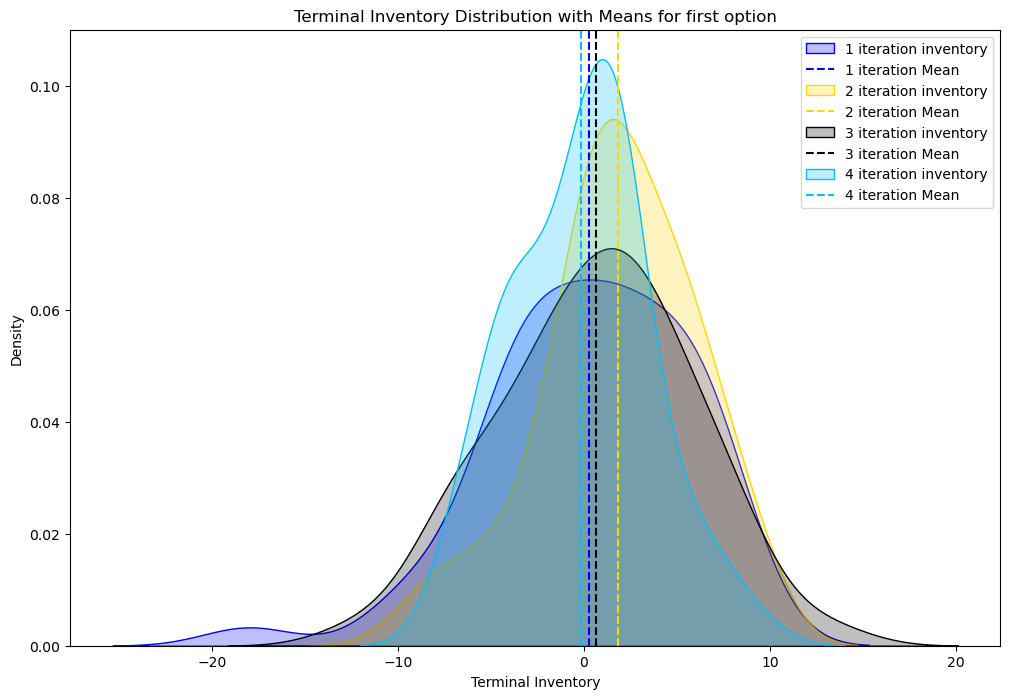

<Figure size 640x480 with 0 Axes>

In [10]:
# plot the distribution of terminal inventory for first_option_terminal_inventory

plt.figure(figsize=(12, 8))  # Optional: Adjust figure size for better visibility

index = 0
# Plot KDE for each reward column and its mean
for column, color in zip(first_option_terminal_inv_df.columns, mean_colors):
    
    # Plot the KDE
    sns.kdeplot(first_option_terminal_inv_df[column], color=color, fill=True, label=f'{index + 1} iteration inventory')
    
    # Calculate and plot the mean
    mean_value = first_option_terminal_inv_df[column].mean()
    plt.axvline(mean_value, linestyle='--', color=color, label=f'{index + 1} iteration Mean')

    index += 1

# Setting labels and title
plt.xlabel('Terminal Inventory')
plt.ylabel('Density')
plt.title('Terminal Inventory Distribution with Means for first option')

# Improve the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Deduplicate legend entries
plt.legend(by_label.values(), by_label.keys())

# Display the plot
plt.show()

# save the plot
plt.savefig('first_option_terminal_inventory_plot.png')

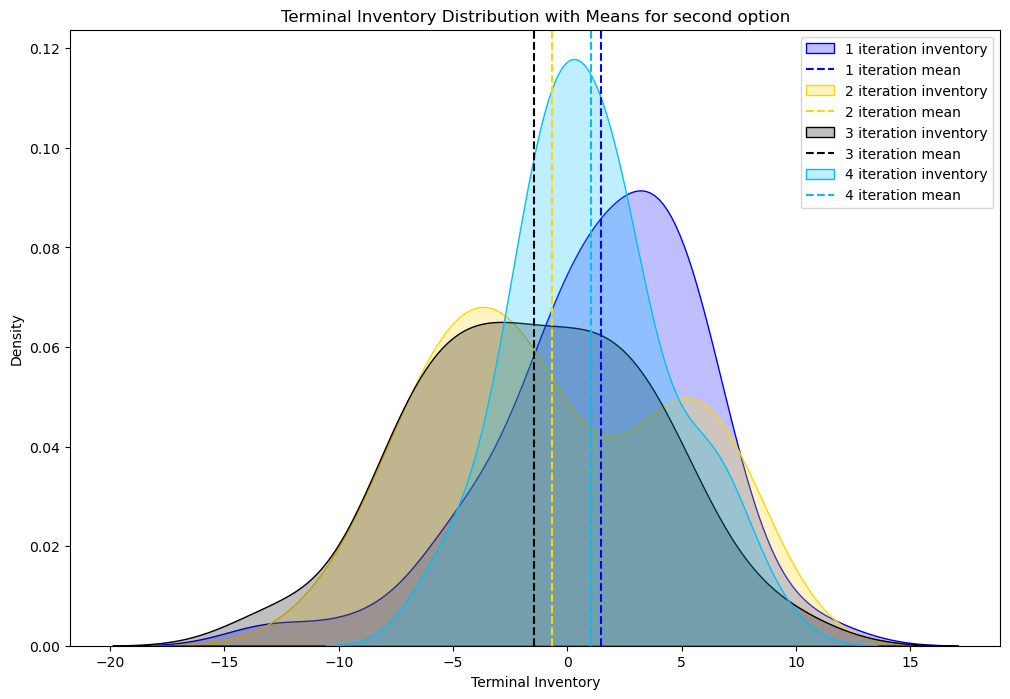

<Figure size 640x480 with 0 Axes>

In [11]:
# plot the error estimation of the path 


plt.figure(figsize=(12, 8))  # Optional: Adjust figure size for better visibility

# Plot KDE for each reward column and its mean
index = 0
for column, color in zip(second_option_terminal_inv_df.columns, mean_colors):
    # Plot the KDE
    sns.kdeplot(second_option_terminal_inv_df[column], color=color, fill=True, label=f'{index + 1} iteration inventory')
    
    # Calculate and plot the mean
    mean_value = second_option_terminal_inv_df[column].mean()
    plt.axvline(mean_value, linestyle='--', color=color, label=f'{index + 1} iteration mean')

    index += 1

# Setting labels and title
plt.xlabel('Terminal Inventory')
plt.ylabel('Density')
plt.title('Terminal Inventory Distribution with Means for second option')

# Improve the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Deduplicate legend entries
plt.legend(by_label.values(), by_label.keys())

# Display the plot
plt.show()

# save the plot
plt.savefig('second_option_terminal_inventory_plot.png')

In [37]:
first_option_1_iter = inv_path[1, :15, :, 0]
first_option_2_iter = inv_path[2, :15, :, 0]
first_option_3_iter = inv_path[3, :15, :, 0]
first_option_4_iter = inv_path[4, :15, :, 0]

first_option_1_iter_df = pd.DataFrame(first_option_1_iter)
first_option_2_iter_df = pd.DataFrame(first_option_2_iter)
first_option_3_iter_df = pd.DataFrame(first_option_3_iter)
first_option_4_iter_df = pd.DataFrame(first_option_4_iter)

# make the index and new column names for first_option df

# make the index the new column names
# extract all points' value to be another column

melt_1_option_1_iter = first_option_1_iter_df.melt(var_name='time_step', value_name='inventory')
melt_1_option_2_iter = first_option_2_iter_df.melt(var_name='time_step', value_name='inventory')
melt_1_option_3_iter = first_option_3_iter_df.melt(var_name='time_step', value_name='inventory')
melt_1_option_4_iter = first_option_4_iter_df.melt(var_name='time_step', value_name='inventory')


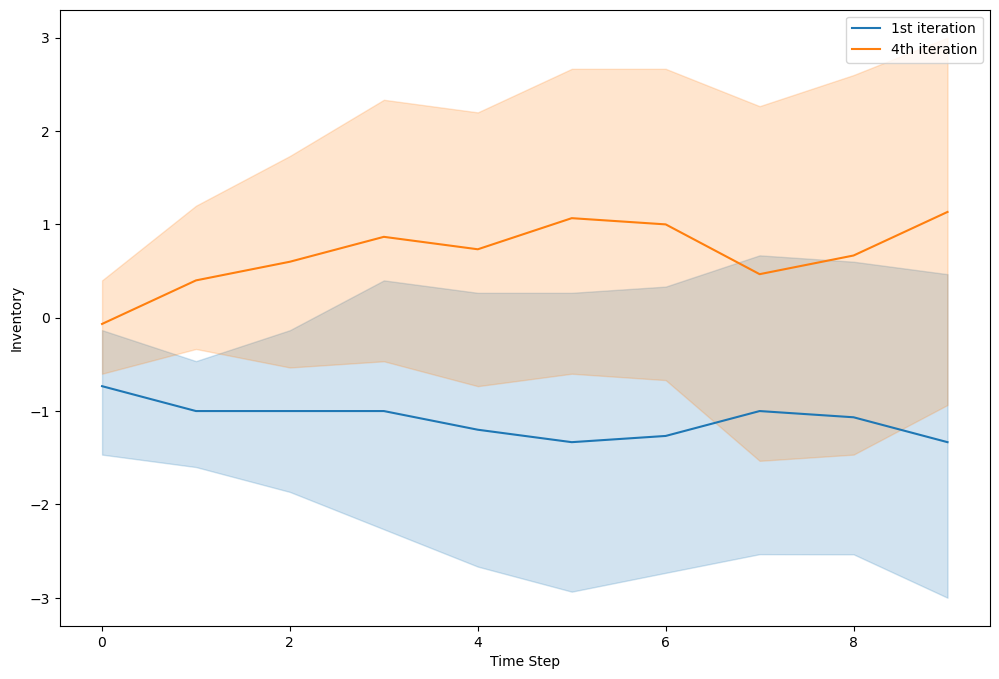

In [38]:
fig = plt.figure(figsize=(12, 8))

# Plot the data
sns.lineplot(x='time_step', y='inventory', data=melt_1_option_1_iter, label='1st iteration')
#sns.lineplot(x='time_step', y='inventory', data=melt_1_option_2_iter, label='2nd iteration')
#sns.lineplot(x='time_step', y='inventory', data=melt_1_option_3_iter, label='3rd iteration')
sns.lineplot(x='time_step', y='inventory', data=melt_1_option_4_iter, label='4th iteration')

# Setting labels and title
plt.xlabel('Time Step')
plt.ylabel('Inventory')
plt.show()